In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("train.csv")
data.head(5)

,ID,user,movie,rating,timestamp
0,1802700,13239,367,5.0,8.452071e+08
1,1290352,9469,6323,3.5,1.120504e+09
2,2660900,19250,364,4.0,8.402181e+08
3,2563669,18581,6281,2.0,1.063980e+09
4,763295,5798,1569,3.0,1.136088e+09


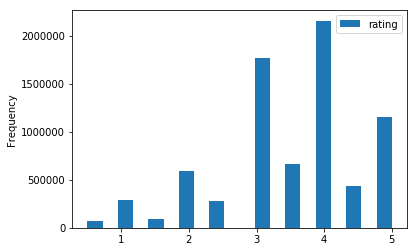

In [3]:
movie_rating_plot = data.plot.hist(x = 'movie', y = 'rating',bins=20)

In [4]:
data.isnull().sum()

ID           0
user         0
movie        0
rating       0
timestamp    0
dtype: int64

In [4]:
X = data.drop('rating', axis=1)

In [5]:
y = data['rating']

In [6]:
test = pd.read_csv('test.csv')
test.shape

(2500014, 4)

In [7]:
#This step can be excluded when working will separate train and test file.
#If we want to test the model with small sample then this step can be helpful.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)
print('Train', X_train.shape, 'Test', X_test.shape)

('Train', (900, 4), 'Test', (100, 4))


In [8]:
gbr = ensemble.GradientBoostingRegressor(n_estimators=500, learning_rate = .01)
gbr.fit(X_train,Y_train)
ypred = gbr.predict(X_test)
print ("Training Score GradientBoosting: ", (gbr.score(X_train,Y_train)))
print ("Test Score GradientBoosting: " , (gbr.score(X_test,Y_test)))

('Training Score GradientBoosting: ', 0.23516999868535959)
('Test Score GradientBoosting: ', -0.16303024395790566)
('Prediction:', ('ID', array([ 3.49133646,  3.48766932,  3.66420658,  3.45296921,  3.11529111,
        3.54157238,  2.52904971,  3.53282778,  3.6722612 ,  3.39606311,
        3.63836916,  3.47796769,  3.51630699,  3.90776895,  3.50299485,
        3.89049892,  3.70203133,  3.28193604,  3.8049057 ,  2.94311905,
        3.52322397,  3.2887948 ,  3.30465975,  3.39895926,  3.59314896,
        3.52697849,  3.93623506,  3.40870241,  3.55723655,  3.64099957,
        3.12778213,  2.23377016,  3.5117914 ,  2.7575716 ,  3.53124561,
        3.22626831,  3.81934831,  3.38333543,  3.34788499,  3.16845818,
        3.0889947 ,  2.3040915 ,  3.6530458 ,  3.25272498,  3.41701953,
        3.48414391,  2.96883244,  3.32699   ,  3.38628231,  3.61339113,
        3.65402636,  3.30484741,  3.3215106 ,  3.30484741,  3.37127446,
        3.56797194,  3.39241209,  3.35600383,  3.43996815,  3.44176724

In [8]:
rf=ensemble.RandomForestRegressor(n_estimators=500,oob_score=True) 
rf.fit(X,y)
ypred = rf.predict(test)
print ("Training Score RandomForest: ", str(rf.score(X,y)))
print ("Cross Validation (10 fold) Score: " , np.mean(cross_val_score(rf, X, y, cv=10)))

('Training Score RandomForest: ', '0.868128124638')


In [18]:
X_test['ID'].head(5)

521    7923358
737    1997843
740    1892317
660    3543420
411    7438720
Name: ID, dtype: int64

In [9]:
test_id = test['ID']
submit = pd.DataFrame()
submit['ID']=test_id
submit['rating'] = ypred
submit.to_csv('submission.csv', index = False)
submit.head()

,ID,rating
0,223392,3.690
1,5165515,2.945
2,9414680,4.073
3,2964100,3.550
4,4233422,3.638
